In [1]:
##Importamos las bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
##Importamos el archivo csv de datos de Titanic con pandas
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
##Con funcion Head visualizamos los datos de las primeras filas
train_data.head()
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
##Con la funcion Info obtenemos la informacion sobre 
##las columnas y los tipos de datos
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [6]:
##Con la funcion describe obtenemos una descripcion estadistica de los datos
train_data.describe()
test_data.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [7]:
##Visión global de todo el conjunto de datos
titanic_full = pd.concat([test_data,train_data])
Survived_full = titanic_full[titanic_full['Survived']==1]
Deceased_full = titanic_full[titanic_full['Survived']==0]

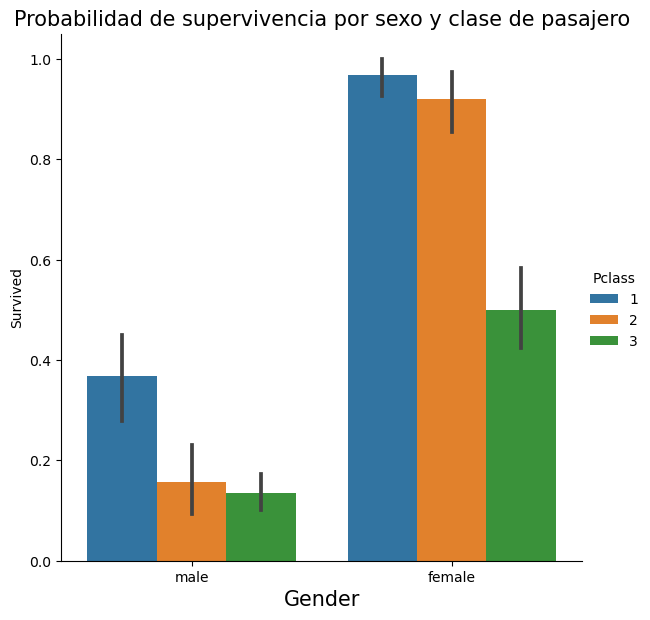

In [8]:
##Parece que las pasajeras tienen más probabilidades de sobrevivir en la trágica catástrofe
g = sns.catplot(x = "Sex", y = "Survived",hue='Pclass', data = titanic_full, kind = "bar", height = 6)
plt.xlabel("Gender",fontsize=15)
plt.title("Probabilidad de supervivencia por sexo y clase de pasajero",fontsize=15)
plt.show()

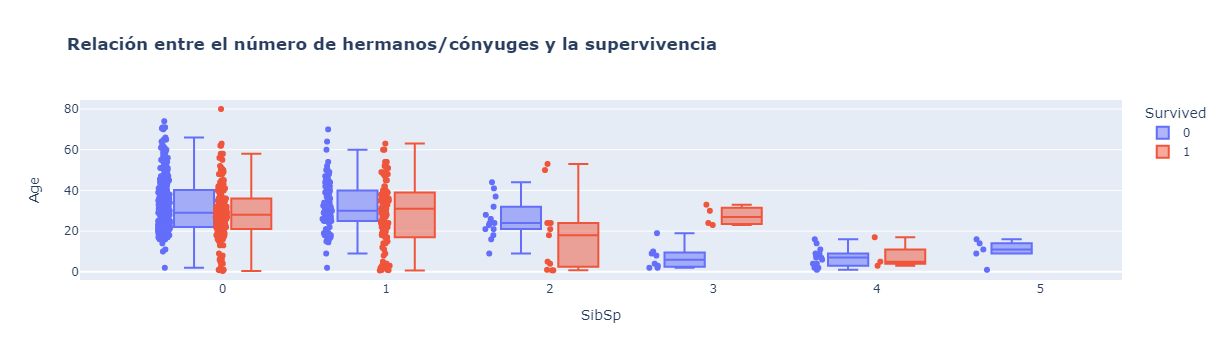

In [10]:
##A medida que aumenta el número de hermanos, disminuyen las posibilidades de supervivencia.
fig = px.box(train_data, x="SibSp", y="Age",color="Survived",points="all",title='<b> Relación entre el número de hermanos/cónyuges y la supervivencia <b>')
fig.update_traces(quartilemethod="inclusive")
fig.show()

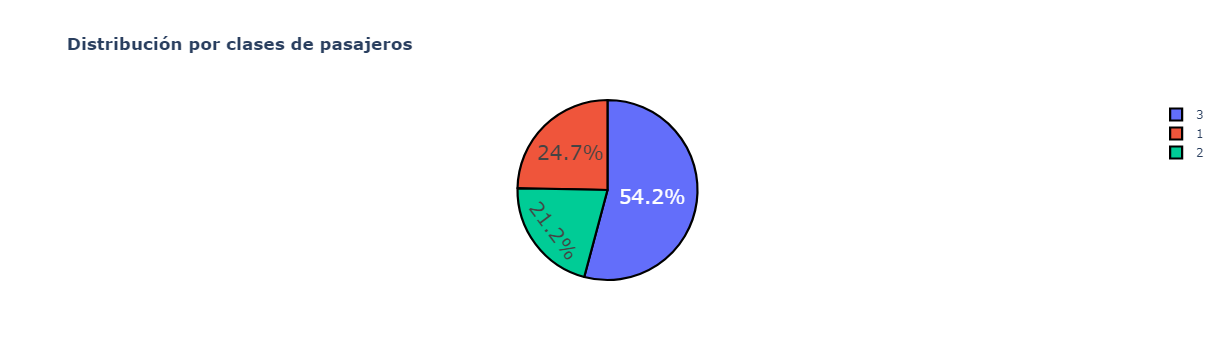

In [11]:
##Los pasajeros de la clase de tercer nivel representan más de la mitad del total de almas a bordo
fig = px.pie(titanic_full,names='Pclass',title='<b> Distribución por clases de pasajeros <b>')
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2.2)))

fig.show()

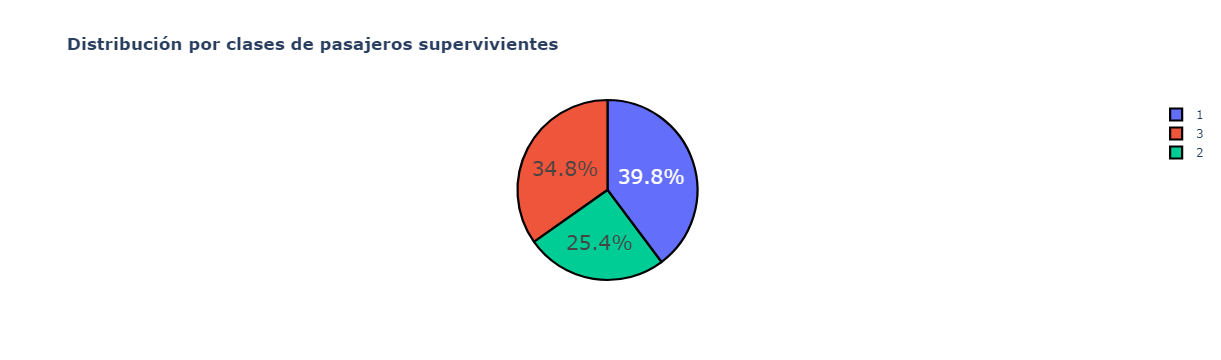

In [12]:
##La probabilidad de supervivencia está desproporcionadamente sesgada hacia los niveles de clase más altos
fig = px.pie(Survived_full,names='Pclass',title='<b> Distribución por clases de pasajeros supervivientes <b>')
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2.2)))

fig.show()

In [15]:
##En primer lugar, echemos un vistazo a la distribución de los valores perdidos en el conjunto de datos
##Age, Fare, Cabin, and Embarked contienen valores omitidos
print('Porcentaje Nan en Cabin es {}{}'.format(100*np.round(titanic_full['Cabin'].isna().sum()/len(titanic_full['Cabin']),4),'%'))

Porcentaje Nan en Cabin es 77.46%


In [17]:
##En el siguiente paso eliminamos los atributos Name y Ticket, ya que tienen poco poder predictivo
drop_cols = ['Name','Ticket']
test_data.drop(columns = drop_cols,inplace=True)
train_data.drop(columns = drop_cols,inplace=True)

In [18]:
##Las columnas del conjunto de datos de prueba que contienen "nan" son : "Age" y "Fare"
nan_cols_test = [i for i in test_data.columns if test_data[i].isnull().any()]
nan_cols_test

['Age', 'Fare', 'Cabin']

In [19]:
##falta un valor en 'Fare' del conjunto de datos de prueba: se sustituye por median()
test_data['Fare'].isnull().sum()

1

In [20]:
##Sustituir el valor que falta por median en la columna "Fare"
test_data['Fare'] =test_data['Fare'].fillna(test_data['Fare'].median())

In [21]:
##sustituir el valor omitido
test_data['Age'] =test_data['Age'].fillna(test_data['Age'].mean())

In [22]:
##Las columnas del conjunto de datos de prueba que contienen "nan" son : Age y fare
nan_cols_train = [i for i in train_data.columns if train_data[i].isnull().any()]
nan_cols_train

['Age', 'Cabin', 'Embarked']

In [24]:
##faltan dos valores en "Embarcado" del conjunto de datos del train:sustitúyalo por mode()
train_data['Embarked'].isnull().sum()
mode = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(mode)
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

In [25]:
##Crear una nueva función: FamilySize y TravelAlone
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] +1

train_data['TravelAlone'] = np.where(train_data['FamilySize']==1,1,0)
test_data['TravelAlone'] = np.where(test_data['FamilySize']==1,1,0)

In [26]:
##Funciones de codificación

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
test_data['Embarked'] = le.fit_transform(test_data['Embarked'])


train_data['Sex'] = train_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test_data['Sex'] = test_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [28]:
##El conjunto de datos de prueba proporcionado por Kaggle no contiene la columna "Survived".
X_train = train_data.loc[:,train_data.columns!='Survived']
y_train = train_data['Survived']
X_test = test_data

In [29]:
##Ver los datos depurados del train

In [30]:
from pandas_profiling import ProfileReport
train_profile = ProfileReport(train_data, title="Train Data")
train_profile

C:\Users\Valentina Maya\AppData\Local\Temp\ipykernel_5484\294506898.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]